In [44]:
#!pip install pyLDAvis

In [45]:
import pandas as pd
import re
import os
from pprint import pprint

# Gensim for topic modeling
import gensim
from gensim.utils import simple_preprocess
from gensim import matutils, models
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [46]:
base_directory = "C:/Users/jonat/Documents/github/job-posting-analysis"


directory = os.chdir(f"{base_directory}/data/cleaned/")
files = os.listdir(".")
files


monster_df = pd.read_csv('combined_data.csv') 
monster_df.head(3)

Unnamed: 0                                       job_title  \
0           0                         Senior Python Developer   
1           1  Senior Partner Solutions Architect (Microsoft)   
2           2                                   IT Technician   

           company_name   job_type  \
0                  Citi  permanent   
1                Amazon  permanent   
2  Ascend Com Pte. Ltd.  permanent   

                                          tech_stack  \
0                                                NaN   
1                                                NaN   
2  ['Switches', 'Mac', 'Windows 10', 'Cloud Compu...   

                                            job_desc  \
0  Job Description :\r\n\r\nJob Purpose:\r\nWe ar...   
1  Job Description :\r\nJob summary\r\nDESCRIPTIO...   
2  Responsibilities:\r\nProvide helpdesk support ...   

                                    industry date_posted  \
0  ['Banking/Accounting/Financial Services']  2022-02-18   
1                    ['Internet/E-commerce']  2022-02-18   
2                                  ['Other']  2022-02-19   

                                                 url   source  lower_salary  \
0  https://www.monster.com.sg/seeker/job-details?...  monster           NaN   
1  https://www.monster.com.sg/seeker/job-details?...  monster           NaN   
2  https://www.monster.com.sg/seeker/job-details?...  monster       24000.0   

   upper_salary  lower_year  upper_year  \
0           NaN         NaN         NaN   
1           NaN         NaN         NaN   
2       36000.0         2.0         5.0   

                                    cleaned_job_desc  \
0  job description     job purpose  we are lookin...   
1  job description   job summary  description  do...   
2  responsibilities  provide helpdesk support for...   

                                extracted_tech_stack  \
0  {'jasminkarma junit', 'job description', 'tabl...   
1                       {'microsoft', 'alwayson   '}   
2                                        {'lan wan'}   

                                      all_tech_stack  
0                                              set()  
1                                              set()  
2  {' Windows 7', ' Routers', ' Wireless', ' Pred...

In [47]:
monster_df.cleaned_job_desc	[0]

'job description     job purpose  we are looking for a skilled python developer who can design and build bestinclass data driven applications for front office teams across the global markets business you will work closely with product owners project managers developers data scientists and other team members to deliver solutions through new and existing channels you will need to be confident to work with senior business stakeholders to understand their requirements and to ideate and drive the development of innovative technology solutions in a timely manner    job backgroundcontext  we believe the future is here with us home to where we define ideate develop and distribute productionready financial solutions of farreaching impact and right now the door is open to help develop the future of our technology for a truly global client base this means collaborating with the keenest minds in data science big data software engineering web development ux design and more doers looking to bring th

In [48]:
re.sub('\n', "", '\r\n\r\nJob Purpose:\r\nWe are looking f')

'\r\rJob Purpose:\rWe are looking f'

In [49]:
re.sub('\r','','\r\nJob Purpose:\r\nWe are looking f')

'\nJob Purpose:\nWe are looking f'

In [50]:
import re
x = '\r\n\r\nJob Purpose:\r\nWe are -------------------!!@#!!--------------looking f??'
x= x.replace("\r", "")
x = x.replace ("\n", "")
x = x.replace("-", "")
x =re.sub(r'[^\w\s]', '', x)

x

'Job PurposeWe are looking f'

In [51]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [61]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['u','ubs','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def clean_job_description(x):

    x = re.sub(r'\w*\d\w*','', str(x))
    x = x.replace("\r", " ")
    x = x.replace ("\n", " ")
    x = re.sub(r'[^\w\s]', '', x)
    x = x.lower()
    x = x.split(' ')
    return x

def remove_stop_words(x,stop_words):
    cleaned_list = []
    for i in x: 
        if i != "" and i not in stop_words:
            cleaned_list.append(lemmatizer.lemmatize(i))
            
    
    return cleaned_list

def removeu(x):
    no_u = []
    for i in x:
        if len(i)>1:
            no_u.append(i)
    return no_u
    
        


In [62]:
monster_job_description = monster_df['cleaned_job_desc']
monster_job_description = monster_job_description.apply(lambda x: clean_job_description(x))
monster_job_description = monster_job_description.apply(lambda x: remove_stop_words(x,stop_words))
monster_job_description = monster_job_description.apply(lambda x: removeu(x))
monster_job_description.tail(10)
# monster_job_description = monster_job_description.to_frame(name='job_description')
# monster_job_description

11438    [dell, technology, leader, providing, technolo...
11439    [sephora, stand, together, stand, something, e...
11440    [best, candidate, experience, please, consider...
11441    [job, requirement, bonus, point, responsible, ...
11442    [looking, selfmotivated, team, member, crave, ...
11443    [looking, net, devops, engineer, join, growing...
11444    [alpha, stone, capital, looking, amazing, devo...
11445    [part, growing, team, consisting, ml, expert, ...
11446    [hiring, software, engineer, expertise, fronte...
11447    [job, requirement, deploy, operate, maintain, ...
Name: cleaned_job_desc, dtype: object

In [63]:
monster_job_description.iloc[0]

['job',
 'description',
 'job',
 'purpose',
 'looking',
 'skilled',
 'python',
 'developer',
 'design',
 'build',
 'bestinclass',
 'data',
 'driven',
 'application',
 'front',
 'office',
 'team',
 'across',
 'global',
 'market',
 'business',
 'work',
 'closely',
 'product',
 'owner',
 'project',
 'manager',
 'developer',
 'data',
 'scientist',
 'team',
 'member',
 'deliver',
 'solution',
 'new',
 'existing',
 'channel',
 'confident',
 'work',
 'senior',
 'business',
 'stakeholder',
 'understand',
 'requirement',
 'ideate',
 'drive',
 'development',
 'innovative',
 'technology',
 'solution',
 'timely',
 'manner',
 'job',
 'backgroundcontext',
 'believe',
 'future',
 'home',
 'define',
 'ideate',
 'develop',
 'distribute',
 'productionready',
 'financial',
 'solution',
 'farreaching',
 'impact',
 'door',
 'open',
 'help',
 'develop',
 'future',
 'technology',
 'truly',
 'global',
 'client',
 'base',
 'mean',
 'collaborating',
 'keenest',
 'mind',
 'data',
 'science',
 'big',
 'data',
 's

In [65]:
monster_job_description.tolist()

[['job',
  'description',
  'job',
  'purpose',
  'looking',
  'skilled',
  'python',
  'developer',
  'design',
  'build',
  'bestinclass',
  'data',
  'driven',
  'application',
  'front',
  'office',
  'team',
  'across',
  'global',
  'market',
  'business',
  'work',
  'closely',
  'product',
  'owner',
  'project',
  'manager',
  'developer',
  'data',
  'scientist',
  'team',
  'member',
  'deliver',
  'solution',
  'new',
  'existing',
  'channel',
  'confident',
  'work',
  'senior',
  'business',
  'stakeholder',
  'understand',
  'requirement',
  'ideate',
  'drive',
  'development',
  'innovative',
  'technology',
  'solution',
  'timely',
  'manner',
  'job',
  'backgroundcontext',
  'believe',
  'future',
  'home',
  'define',
  'ideate',
  'develop',
  'distribute',
  'productionready',
  'financial',
  'solution',
  'farreaching',
  'impact',
  'door',
  'open',
  'help',
  'develop',
  'future',
  'technology',
  'truly',
  'global',
  'client',
  'base',
  'mean',
  '

## Create Corpus

In [66]:
def str_to_list(text):
    text = text[1:len(text)-1]
    #text_list = text.split(',')
    text_list = [text.strip()[1:-1] for text in text]
    return text_list

In [67]:
data_lemmatized = monster_job_description.tolist()
#data_lemmatized = [str_to_list(text) for text in data_lemmatized]
print(data_lemmatized[:10])

[['job', 'description', 'job', 'purpose', 'looking', 'skilled', 'python', 'developer', 'design', 'build', 'bestinclass', 'data', 'driven', 'application', 'front', 'office', 'team', 'across', 'global', 'market', 'business', 'work', 'closely', 'product', 'owner', 'project', 'manager', 'developer', 'data', 'scientist', 'team', 'member', 'deliver', 'solution', 'new', 'existing', 'channel', 'confident', 'work', 'senior', 'business', 'stakeholder', 'understand', 'requirement', 'ideate', 'drive', 'development', 'innovative', 'technology', 'solution', 'timely', 'manner', 'job', 'backgroundcontext', 'believe', 'future', 'home', 'define', 'ideate', 'develop', 'distribute', 'productionready', 'financial', 'solution', 'farreaching', 'impact', 'door', 'open', 'help', 'develop', 'future', 'technology', 'truly', 'global', 'client', 'base', 'mean', 'collaborating', 'keenest', 'mind', 'data', 'science', 'big', 'data', 'software', 'engineering', 'web', 'development', 'ux', 'design', 'doer', 'looking', '

In [68]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Filter out tokens that appear in only 1 documents and appear in more than 90% of the documents
id2word.filter_extremes(no_below=5, no_above=0.85)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [69]:
# Create a dictionary representation of the documents. Each word gets an id
print('Sample word to id mappings:\n', list(id2word.items())[:50])
print()
print('Total Vocabulary Size:', len(id2word))

Sample word to id mappings:
 [(0, 'able'), (1, 'accommodation'), (2, 'achieve'), (3, 'across'), (4, 'action'), (5, 'affirmative'), (6, 'agile'), (7, 'ahead'), (8, 'alone'), (9, 'analytics'), (10, 'andor'), (11, 'angular'), (12, 'ant'), (13, 'anywhere'), (14, 'apac'), (15, 'applicant'), (16, 'application'), (17, 'apply'), (18, 'architecture'), (19, 'array'), (20, 'associated'), (21, 'aws'), (22, 'backgroundcontext'), (23, 'base'), (24, 'based'), (25, 'believe'), (26, 'best'), (27, 'bestinclass'), (28, 'bi'), (29, 'big'), (30, 'bold'), (31, 'boot'), (32, 'bring'), (33, 'broad'), (34, 'broader'), (35, 'build'), (36, 'business'), (37, 'caching'), (38, 'capability'), (39, 'capable'), (40, 'career'), (41, 'cd'), (42, 'centric'), (43, 'change'), (44, 'channel'), (45, 'ci'), (46, 'citi'), (47, 'citigroup'), (48, 'clear'), (49, 'client')]

Total Vocabulary Size: 13245


## Building LDA Model

### Hypertuning Model Parameters

In [70]:
# supporting function
def compute_evaluation_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    perplexity = lda_model.log_perplexity(corpus)
    
    return [coherence_model_lda.get_coherence(), perplexity]

In [71]:
# Iterate over possible number of topics.
topic_param = []
coherence_score = []
perplexity_score = []

for k in range(2, 20):
    print('topic number: ', k)
    ev = compute_evaluation_values(corpus=corpus, dictionary=id2word, k=k)
    coherence_score.append(ev[0])
    perplexity_score.append(ev[1])
    print('Coherence Score: ', ev[0])
    print('Perplexity Score: ', ev[1])
    print()
    
    topic_param.append(k)

topic number:  2
Coherence Score:  0.3263829651205575
Perplexity Score:  -7.309580722565393

topic number:  3
Coherence Score:  0.34753207572738215
Perplexity Score:  -7.264249106677614

topic number:  4
Coherence Score:  0.35310770650431933
Perplexity Score:  -7.2527272750375005

topic number:  5
Coherence Score:  0.35405018717161274
Perplexity Score:  -7.217084868836714

topic number:  6
Coherence Score:  0.3640421286448104
Perplexity Score:  -7.200786729585057

topic number:  7
Coherence Score:  0.39863792679895865
Perplexity Score:  -7.1846640369210055

topic number:  8
Coherence Score:  0.4290721147900797
Perplexity Score:  -7.173714988215575

topic number:  9
Coherence Score:  0.387731795082909
Perplexity Score:  -7.20744732503902

topic number:  10
Coherence Score:  0.4246776953041196
Perplexity Score:  -7.241496849718975

topic number:  11
Coherence Score:  0.4385640738769634
Perplexity Score:  -7.273628951997768

topic number:  12
Coherence Score:  0.41512305890693607
Perplexi

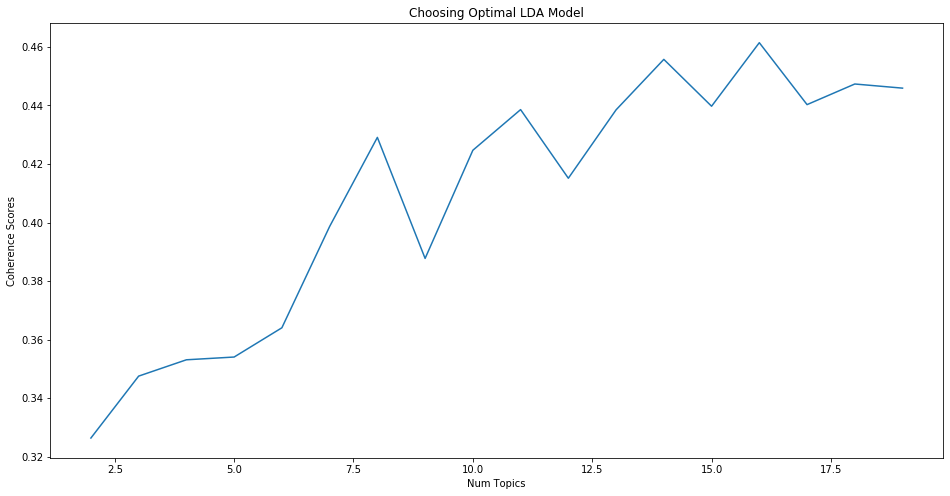

In [72]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(topic_param, coherence_score)

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Scores")
plt.show()

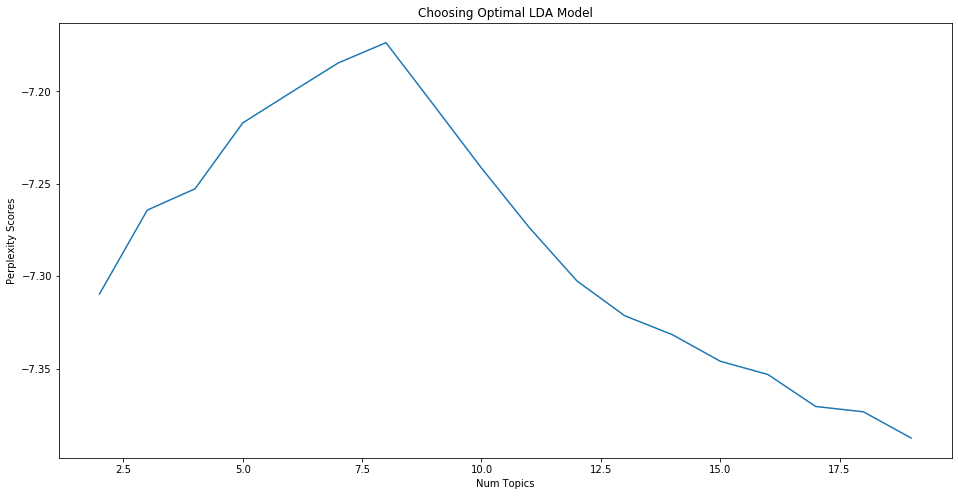

In [73]:
plt.figure(figsize=(16, 8))
plt.plot(topic_param, perplexity_score)

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Perplexity Scores")
plt.show()

### Final LDA Model

In [85]:
ntopics = 16

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=ntopics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=20,
                                       per_word_topics=True)

In [86]:
# Print the Keyword in the topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.017*"technology" + 0.014*"client" + 0.013*"work" + 0.013*"business" + 0.009*"people" + 0.008*"opportunity" + 0.008*"working" + 0.008*"service" + 0.007*"role" + 0.007*"digital"'), (1, '0.032*"client" + 0.019*"ibm" + 0.018*"technology" + 0.014*"business" + 0.014*"skill" + 0.012*"world" + 0.011*"expertise" + 0.011*"work" + 0.011*"accenture" + 0.011*"professional"'), (2, '0.038*"aws" + 0.021*"amazon" + 0.012*"work" + 0.010*"business" + 0.010*"service" + 0.009*"gender" + 0.009*"customer" + 0.009*"qualification" + 0.007*"candidate" + 0.007*"working"'), (3, '0.021*"solution" + 0.018*"salesforce" + 0.016*"customer" + 0.015*"company" + 0.014*"business" + 0.008*"work" + 0.007*"engineer" + 0.007*"agency" + 0.006*"service" + 0.006*"world"'), (4, '0.091*"data" + 0.013*"analytics" + 0.010*"science" + 0.010*"learning" + 0.009*"platform" + 0.009*"business" + 0.009*"engineering" + 0.008*"tool" + 0.008*"big" + 0.007*"work"'), (5, '0.037*"solution" + 0.034*"customer" + 0.032*"technical" + 0.020*"

In [87]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse = True))

In [88]:
topic_num = []
print(lda_model.get_document_topics(corpus))
for n in range(len(monster_df)):
    get_document_topics = lda_model.get_document_topics(corpus[n])
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    topic_num.append(sorted_doc_topics[0][0])

In [89]:
monster_df['Topic'] = topic_num

In [90]:
monster_df

Unnamed: 0                                       job_title  \
0               0                         Senior Python Developer   
1               1  Senior Partner Solutions Architect (Microsoft)   
2               2                                   IT Technician   
3               3                               Customer Engineer   
4               4                               Customer Engineer   
...           ...                                             ...   
11443        2896                                 DevOps Engineer   
11444        2897                                 DevOps Engineer   
11445        2898                                 DevOps Engineer   
11446        2899                               Software Engineer   
11447        2900          Sr. Site Reliability Engineer - Hadoop   

                                      company_name   job_type  \
0                                             Citi  permanent   
1                                           Amazon  permanent   
2                             Ascend Com Pte. Ltd.  permanent   
3      Applied Materials South East Asia Pte. Ltd.  permanent   
4      Applied Materials South East Asia Pte. Ltd.  permanent   
...                                            ...        ...   
11443                                         2C2P  Permanent   
11444                                      FINXFLO  Permanent   
11445                                     Quilt.AI  Permanent   
11446                     Zoku Integrated Commerce  Permanent   
11447                            Xiaomi Technology  Permanent   

                                              tech_stack  \
0                                                    NaN   
1                                                    NaN   
2      ['Switches', 'Mac', 'Windows 10', 'Cloud Compu...   
3      ['Scalability', 'Cloud Computing', 'Google Clo...   
4      ['Scalability', 'Cloud Computing', 'Google Clo...   
...                                                  ...   
11443  ['GitLab', 'HTTP', 'UDP', 'TCP', 'ShellScript'...   
11444  ['Strategy', 'ShellScript', 'CI', 'Shell', 'UN...   
11445  ['Next.js', 'Docker', 'Cloudflare', 'DockerSwa...   
11446  ['API', 'Magento', 'CI', 'DOM', 'Node.js', 'No...   
11447  ['MapReduce', 'API', 'Container', 'JMX', 'Anal...   

                                                job_desc  \
0      Job Description :\r\n\r\nJob Purpose:\r\nWe ar...   
1      Job Description :\r\nJob summary\r\nDESCRIPTIO...   
2      Responsibilities:\r\nProvide helpdesk support ...   
3      Key Responsibilities\r\nPerforms all standard ...   
4      Has developed specialized skills or is multi-s...   
...                                                  ...   
11443  2C2P is looking for a .NET DevOps Engineer to ...   
11444  Alpha Stone Capital is looking for an amazing ...   
11445  As part of a growing team consisting of ML exp...   
11446  We are hiring software engineers with expertis...   
11447  Job Requirement： Deploy, operate, maintain, se...   

                                        industry date_posted  \
0      ['Banking/Accounting/Financial Services']  2022-02-18   
1                        ['Internet/E-commerce']  2022-02-18   
2                                      ['Other']  2022-02-19   
3                                      ['Other']  2022-02-19   
4                                      ['Other']  2022-02-19   
...                                          ...         ...   
11443                                        NaN  2022-01-11   
11444                                        NaN  2022-01-11   
11445                                        NaN  2022-01-11   
11446                                        NaN  2022-01-11   
11447                                        NaN  2022-01-11   

                                                     url     source  \
0      https://www.monster.com.sg/seeker/job-details?...    monster   
1      https://www.monster.com.sg/seeker/job

In [91]:
#monster_df[monster_df['job_title'].value_counts() > 1]

## Visualisation

In [92]:
import pyLDAvis.gensim_models as gensimvis

In [93]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.172418  0.050862       1        1  13.045889
15     0.088548 -0.019046       2        1  12.168456
0     -0.072127  0.051980       3        1  10.332504
7     -0.056574  0.071885       4        1  10.036087
8      0.197410 -0.011824       5        1   9.240944
5      0.002292  0.100305       6        1   7.123788
4      0.100861  0.057844       7        1   6.890494
6     -0.186657 -0.024521       8        1   5.451978
9      0.128586 -0.028229       9        1   4.960564
2     -0.114540  0.037385      10        1   4.517128
13     0.000958 -0.045112      11        1   3.968678
14    -0.188454 -0.009800      12        1   2.863845
11     0.149505  0.061154      13        1   2.561255
1     -0.113889  0.035408      14        1   2.539617
10     0.012321 -0.347326      15        1   2.274770
3     -0.120657  0.019035      16        1   2.024002, topic_info=            Term          Freq         Total Category  logprob  loglift
68          data  27480.000000  27480.000000  Default  30.0000  30.0000
411     security  16872.000000  16872.000000  Default  29.0000  29.0000
340     customer  26244.000000  26244.000000  Default  28.0000  28.0000
21           aws  13330.000000  13330.000000  Default  27.0000  27.0000
49        client  11106.000000  11106.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
262        skill    325.420661  21369.519904  Topic16  -5.3061  -0.2845
276      support    305.481146  15324.411230  Topic16  -5.3693  -0.0152
484      ability    300.784257  12981.128699  Topic16  -5.3848   0.1352
200  opportunity    285.041369  12429.483828  Topic16  -5.4386   0.1249
145    including    276.469407  10011.621061  Topic16  -5.4691   0.3107

[1370 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2066      2  0.953175     abap
484       1  0.104999  ability
484       2  0.199443  ability
484       3  0.094368  ability
484       4  0.195746  ability
...     ...       ...      ...
439      13  0.004210    youll
439      14  0.022671    youll
6247     11  0.983636  zealand
2238      8  0.997921  zendesk
4350     12  0.993653     zoom

[5038 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 16, 1, 8, 9, 6, 5, 7, 10, 3, 14, 15, 12, 2, 11, 4])

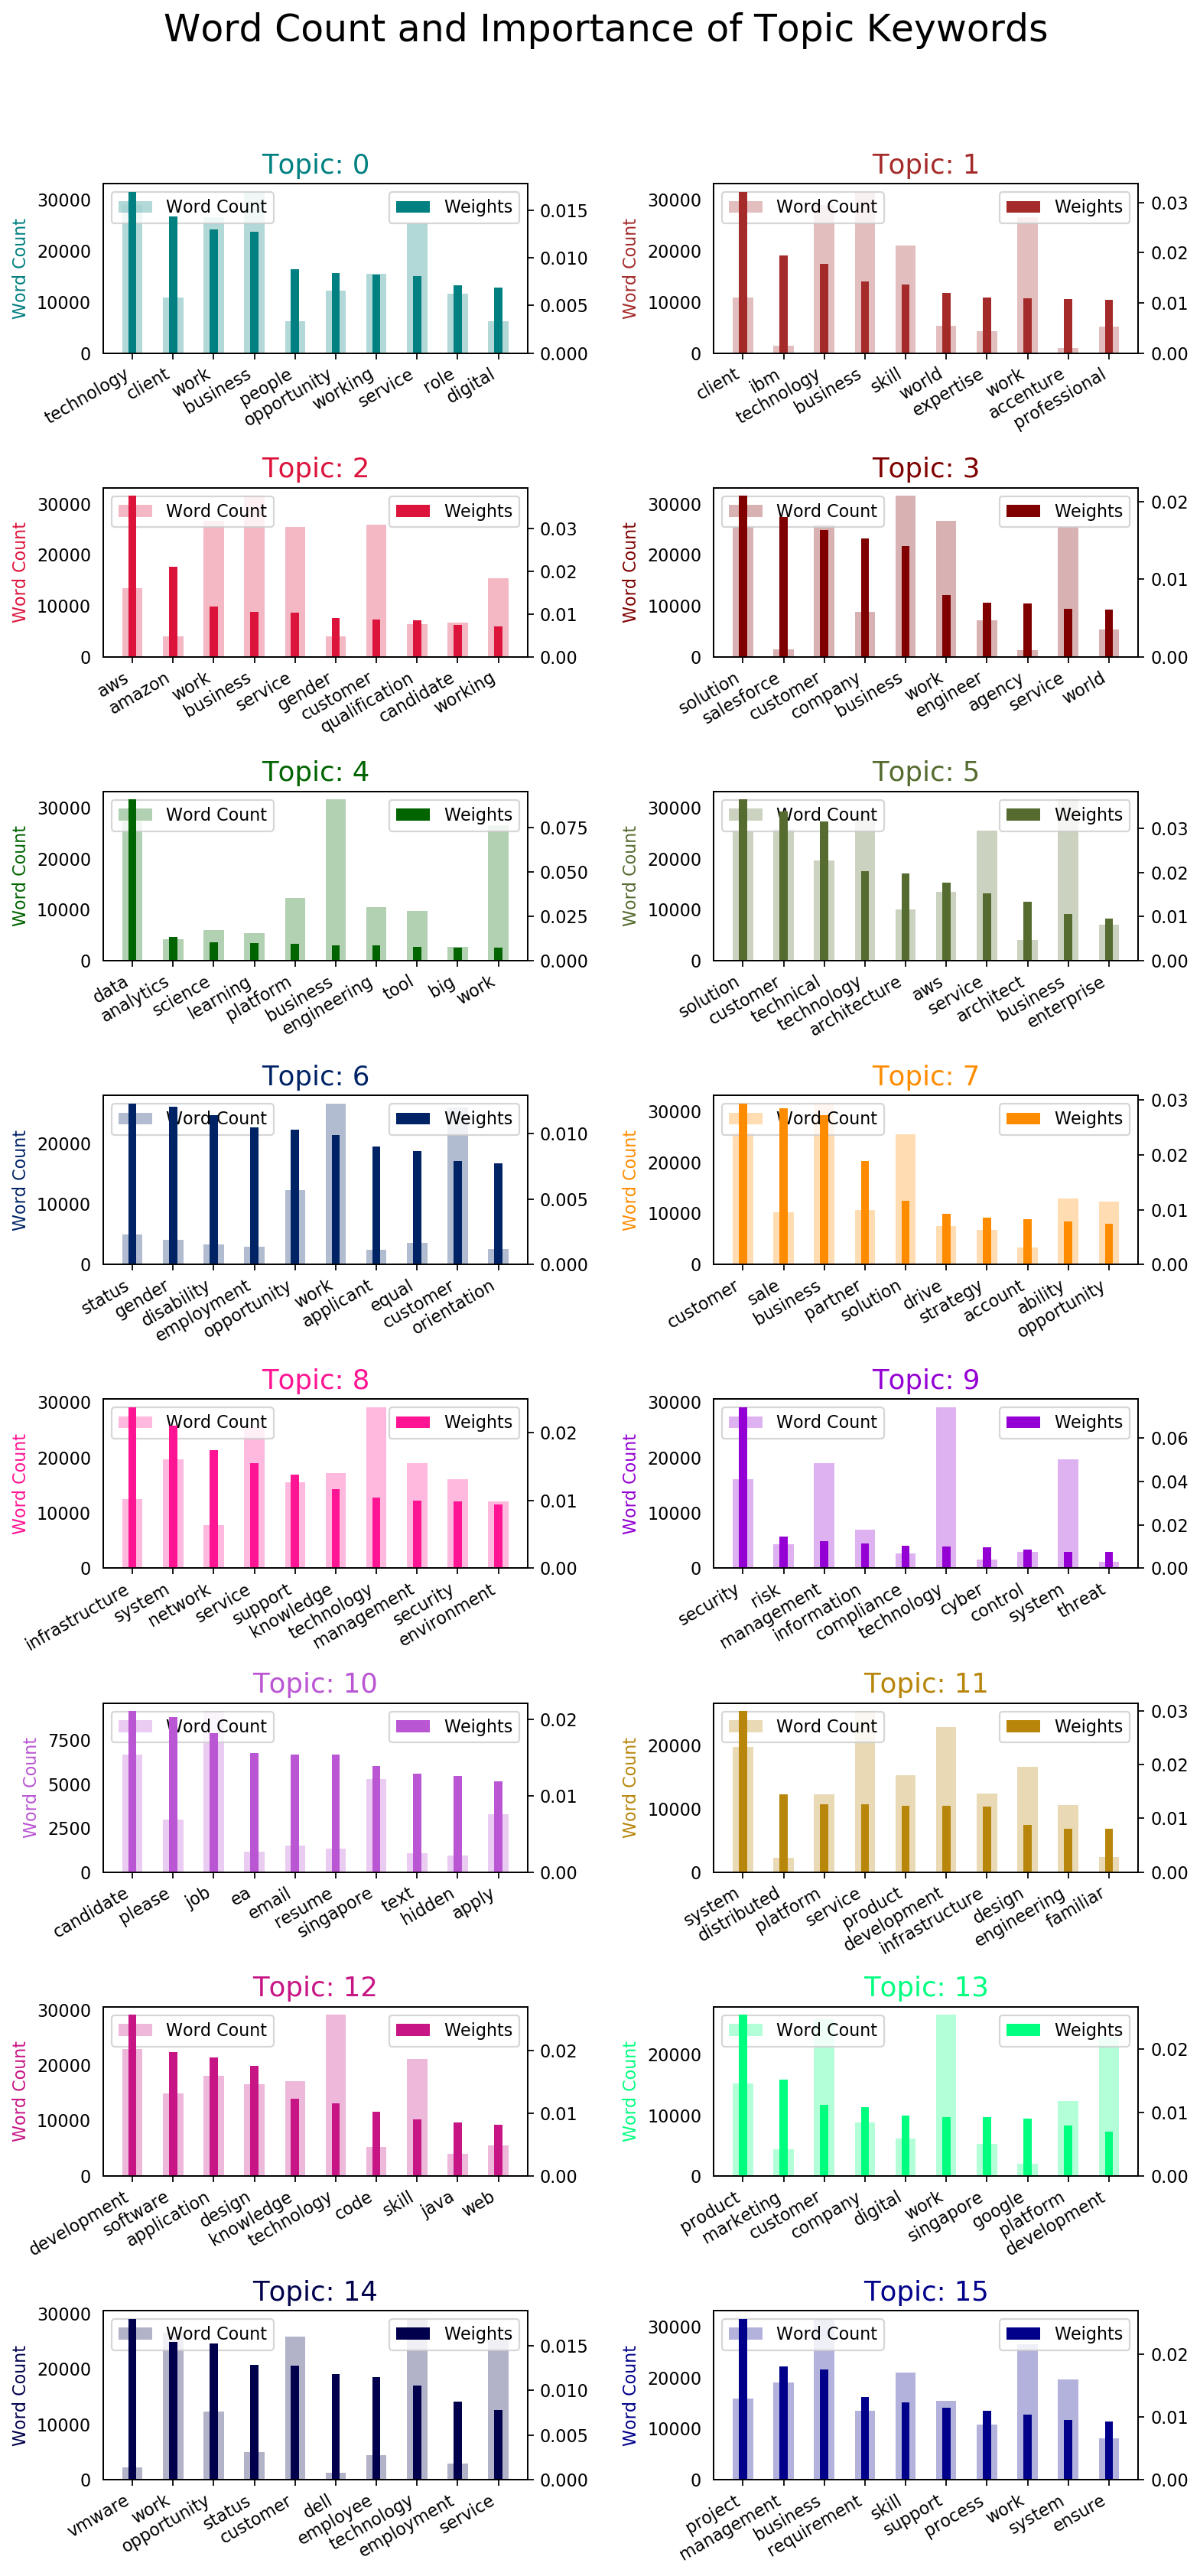

In [94]:
from collections import Counter

topics = lda_model.show_topics(num_topics=18, formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(8, 2, figsize=(10,20), dpi=160)
cols = ['#008080', '#A52A2A', '#DC143C', '#800000', '#006400', '#556b2f', '#002366', '#ff8c00', '#FF1493', '#9400D3',
        '#ba55d3', '#b8860b', '#C71585', '#00ff7f', '#00004C', '#00008B', '#B8860B', '#DEB887', '#8A2BE2', '#1b364a']

for i, ax in enumerate(axes.flatten()):
    if i > ntopics - 1: # break when all topics are shown
        break
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')


fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()